# Data Preparation

Create two lists with random data and a designed linear dependency between the lists.<br>
Put the data into a DataFrame and use `matplotlib` to plot the data.
- `numpy` provides a random number generator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

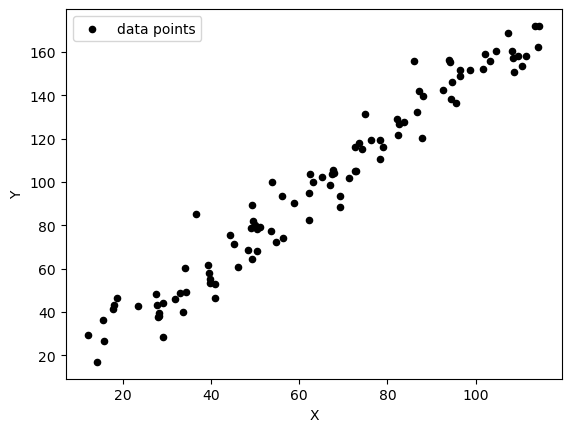

In [2]:
xVar = []
yVar = []

for k in range(1, 100):
    x = k + 15
    xVar.append(x + np.random.normal(loc=0.0, scale=4))
    yVar.append(x * 1.5 + np.random.normal(loc=0.0, scale=6))

coords = list(zip(xVar, yVar))
regrData = pd.DataFrame(coords, columns=["X", "Y"])
regrData.plot(kind="scatter", x="X", y="Y", color="black", label="data points")
plt.legend(loc="upper left")
plt.show()

# Scikit Learn

In [3]:
from sklearn import linear_model

Convert the DataFrame to a format that sklearn's linear model can accept.<br>
This part is important as sklearn is not fully adapted to Pandas, but to Numpy.<br>

In [4]:
X = regrData.iloc[:, 0].values.reshape(-1, 1)
Y = regrData.iloc[:, 1].values.reshape(-1, 1)

***

Create a sklearn regression object and train it to predict a regression line/hyperplane.

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

***

Add the predicted values to the DataFrame

In [6]:
regrData["YPredicted"] = regr.predict(X)

***

Plot the predicted regression line along with the original data entry values

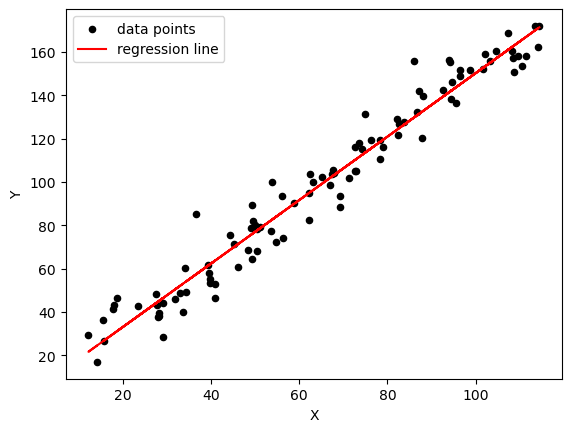

[3.78065974]
[[1.4646471]]


In [7]:
ax = regrData.plot(kind="scatter", x="X", y="Y", color="black", label="data points")
regrData.plot(kind="line", x="X", y="YPredicted", color="red", label="regression line", ax=ax)
plt.legend(loc="upper left")
plt.show()
print(regr.intercept_)
print(regr.coef_)

# Statsmodels library

In [8]:
import statsmodels.formula.api as smf

In [10]:
regrModel = smf.ols(formula="Y ~ X", data=regrData).fit()
regrData["YPredicted2"] = regrModel.predict()
regrModel.params

Intercept    3.780660
X            1.464647
dtype: float64

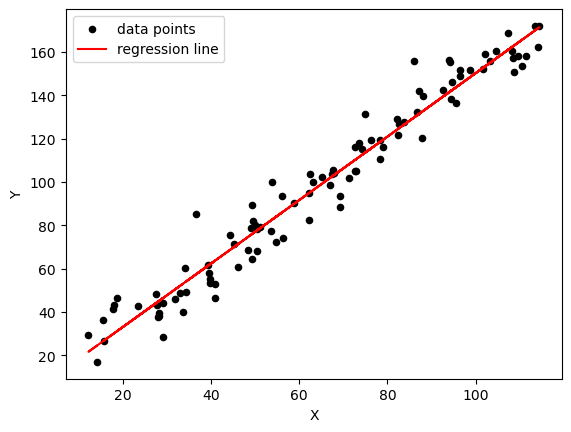

In [11]:
ax = regrData.plot(kind="scatter", x="X", y="Y", color="black", label="data points")
regrData.plot(kind="line", x="X", y="YPredicted2", color="red", label="regression line", ax=ax)
plt.legend(loc="upper left")
plt.show()